Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

In [1]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


#feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset and Information

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
#Let's check how the data is distributed
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Reviewing Data Set at initial stage, found continous datatypes; Target variable data is no of wins which seems to represent regression problem

In [4]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
# check  the shape.. 
df.shape

(30, 17)

wins (W),Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Shutouts, Saves, Complete Games and Errors are integer data columns;Earned Run Average (ERA) is float data type columns. There are 30 Rows and 17 Columns in Data Set.

target is  wins (W)

features are Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

All are continous/numeric data

# Exploratory Data Analysis (EDA)

In [6]:
# check for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null or missing values in data set

In [7]:
# check the statstics of data

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


we see that only the CG and SB  column shows a minimum  gap between it's mean to std value while the other two feature columns show reasonable increase between each of their quantiles.

In [8]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

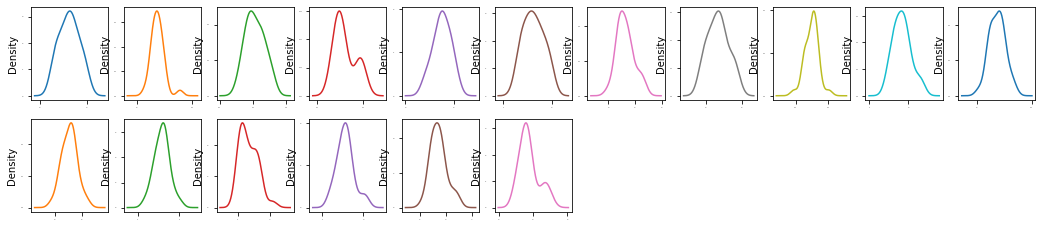

In [11]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

here show that skewness is present in some columns..

# Data visualization

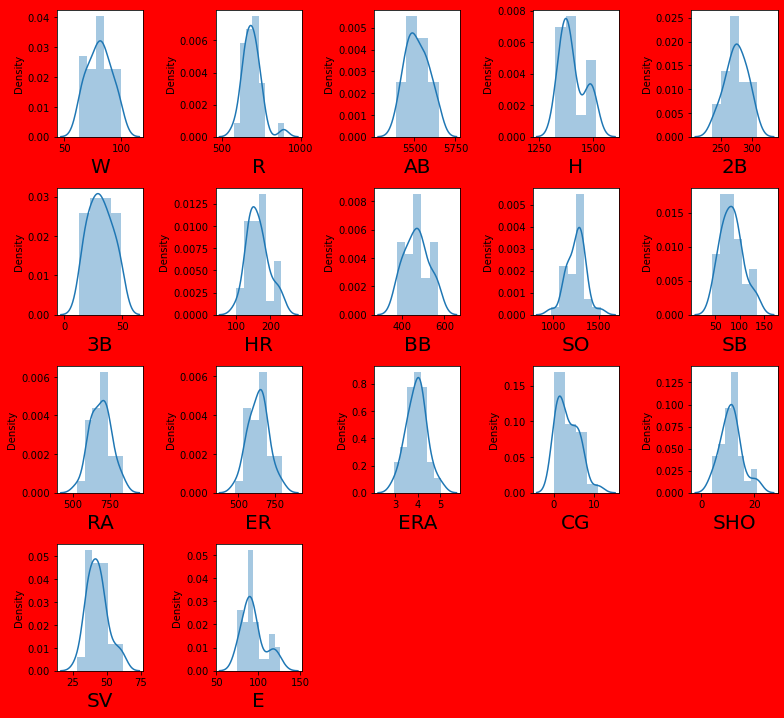

In [12]:
plt.figure(figsize=(11,12), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=17:   # there are 17 column is the given data
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# Pair plot

<Figure size 1080x720 with 0 Axes>

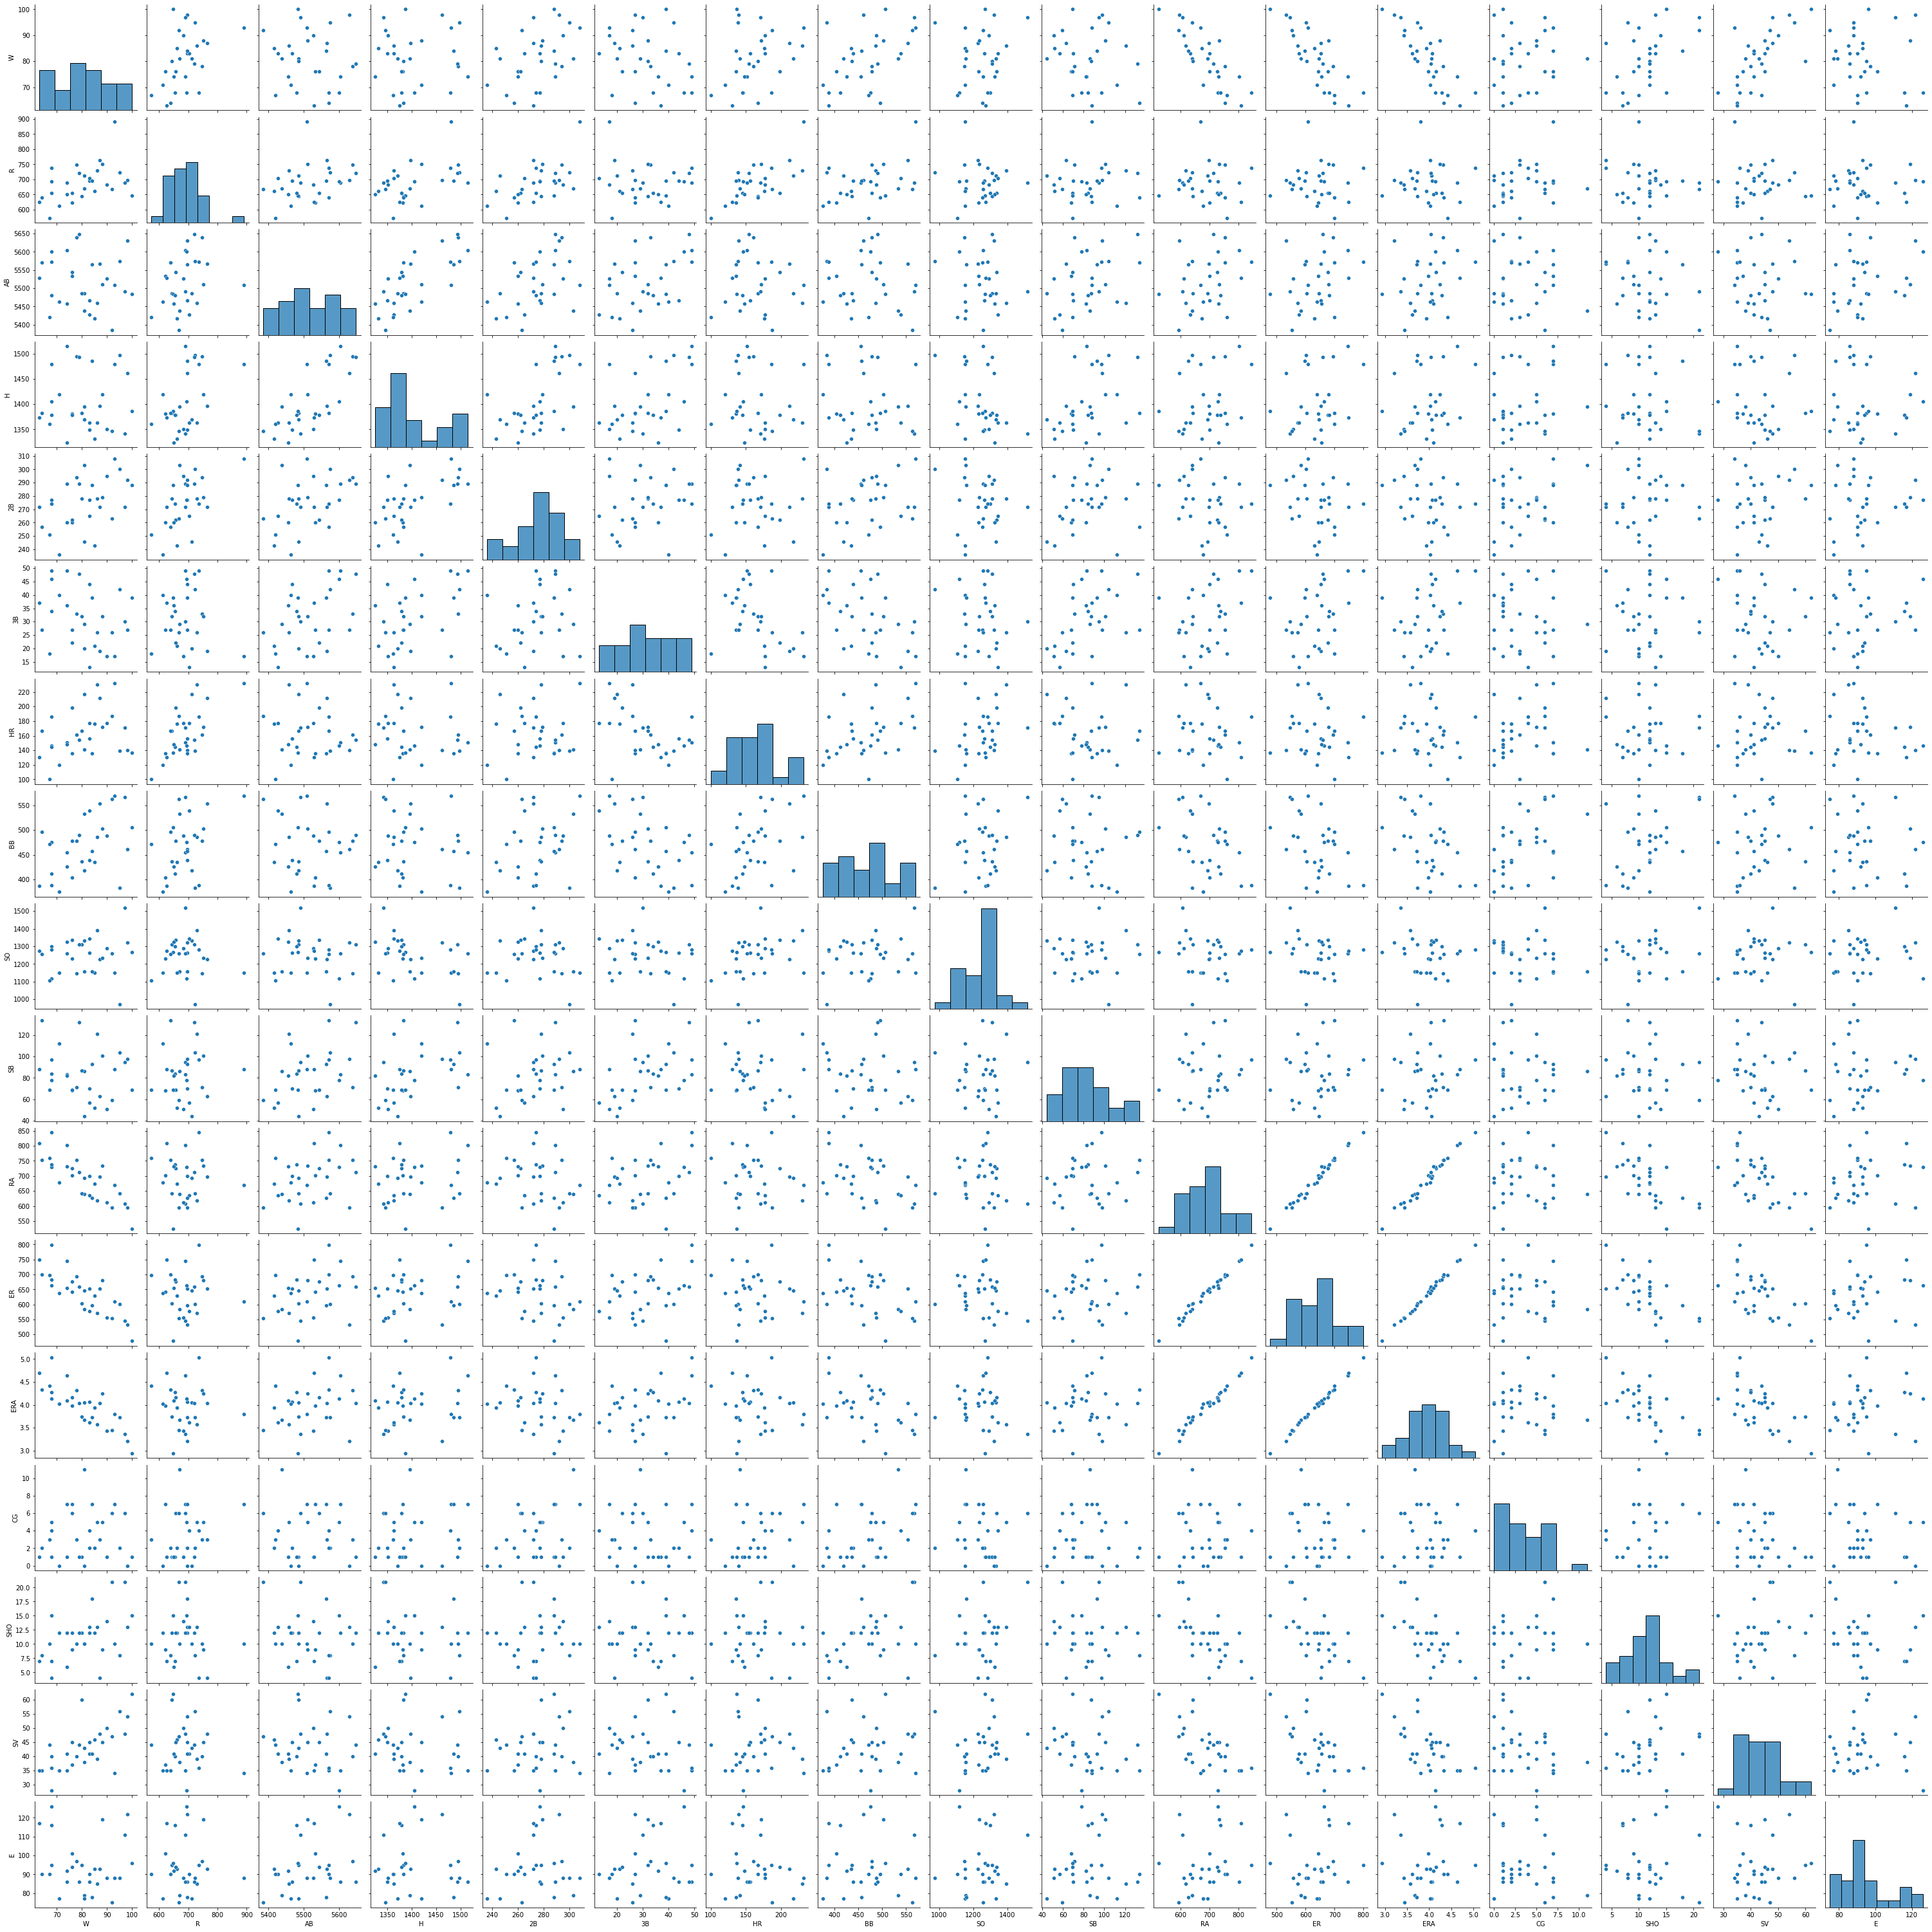

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

now  Run,,runs allowed ,doubled, earned runs and shutouts are highly correlated to wins with ploting of linear correlation
but home run ,triple,walk, are slightly linearly correlated to each..

# Box Plot

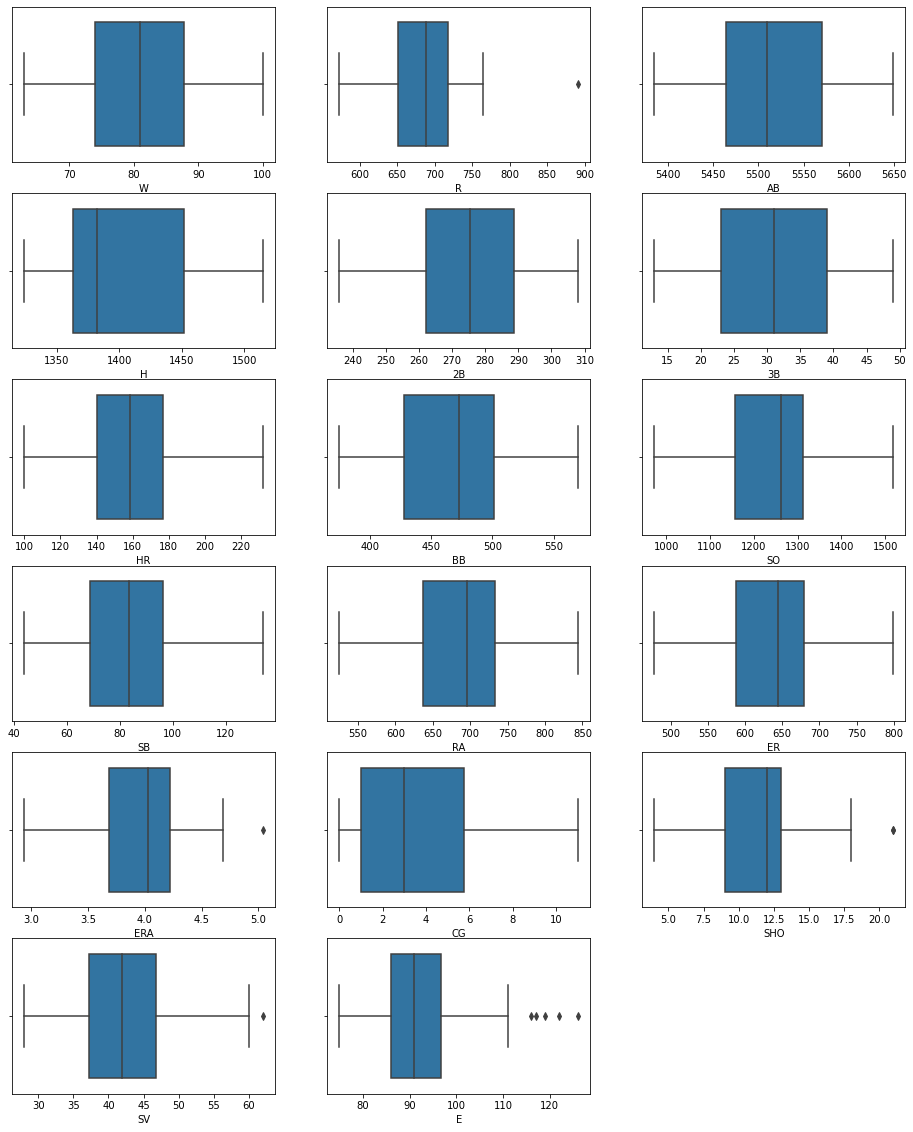

In [14]:
#show the outliers using box plot
plt.figure(figsize=(16,20))
graph = 1

for column in df:
    if graph<=17:   # there are 17 column is the given data
        plt.subplot(6,3,graph)
        ax=sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

outliers are present in R,ERA,SV, SHO and E..

# Distribution plot

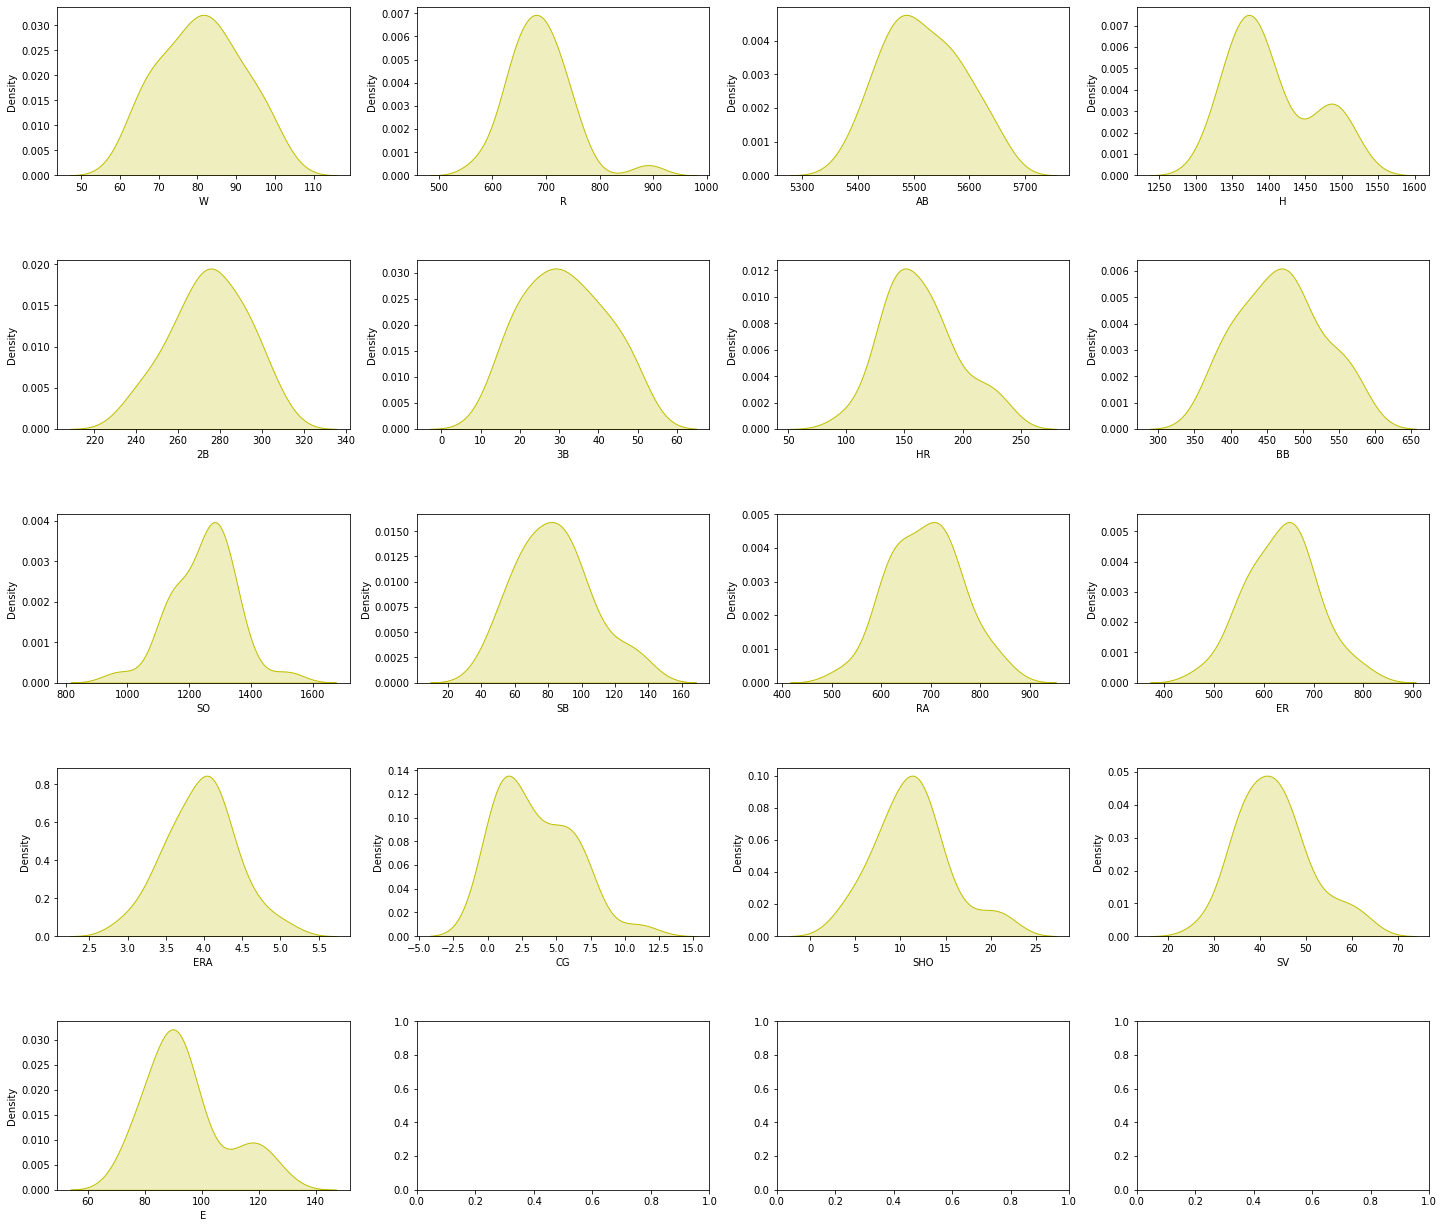

In [15]:
fig, ax = plt.subplots(ncols=4, nrows=5, figsize=(20,17))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the above distribution plot we can see that almost all the columns are maintaining the bell shape curve except for the HR,R,H, SO, CG, SV,E column where we can see a visible skewness.

In [16]:
# Checking relationship between Dependent and Independent variables
x = df.drop(columns = ['W'])
y = df['W']

# Z score method to remove outliers

In [17]:
w= df.copy()

from scipy.stats import zscore

zscor = zscore(w)
zabs = np.abs(zscor)
DF = w[(zabs <3).all(axis=1)] #taking threshold value as 3
print(DF.shape)

print(w.shape)

(29, 17)
(30, 17)


In [18]:
# Checking the dataloss in %

loss = (30-29)/30*100
loss

3.3333333333333335

In [19]:
# Compare skewness
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [20]:
DF.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [21]:
# Reducing the skewness further
df = DF.copy()
wins = ['HR','R','H','SO','CG','SV','E']

skewDF = df[wins].copy()

#Trying log transform method

for col in skewDF:
    skewDF[col] = np.log(skewDF[col])
skewDF.skew()

HR   -0.100335
R    -0.388698
H     0.738423
SO   -0.630142
CG         NaN
SV    0.096752
E     0.583308
dtype: float64

In [22]:
# Trying power transform method

from sklearn.preprocessing import PowerTransformer

powtrans = PowerTransformer(method = 'yeo-johnson', standardize = True)
DF1 = df[wins].copy()
DF1.skew()

HR    0.450862
R    -0.215364
H     0.783772
SO   -0.233815
CG    0.854980
SV    0.627480
E     0.840271
dtype: float64

In [23]:
transformed = powtrans.fit_transform(DF1)

transformed = pd.DataFrame(transformed, columns =DF1.columns)
transformed.skew()

HR    0.000448
R    -0.024842
H     0.000000
SO    0.051530
CG   -0.045947
SV   -0.000925
E     0.065585
dtype: float64

In [24]:
skewDF.skew()

HR   -0.100335
R    -0.388698
H     0.738423
SO   -0.630142
CG         NaN
SV    0.096752
E     0.583308
dtype: float64

Comparing outputs of Log Transformer and Power Transformer method, it is determined that Power Transformer gives better result.

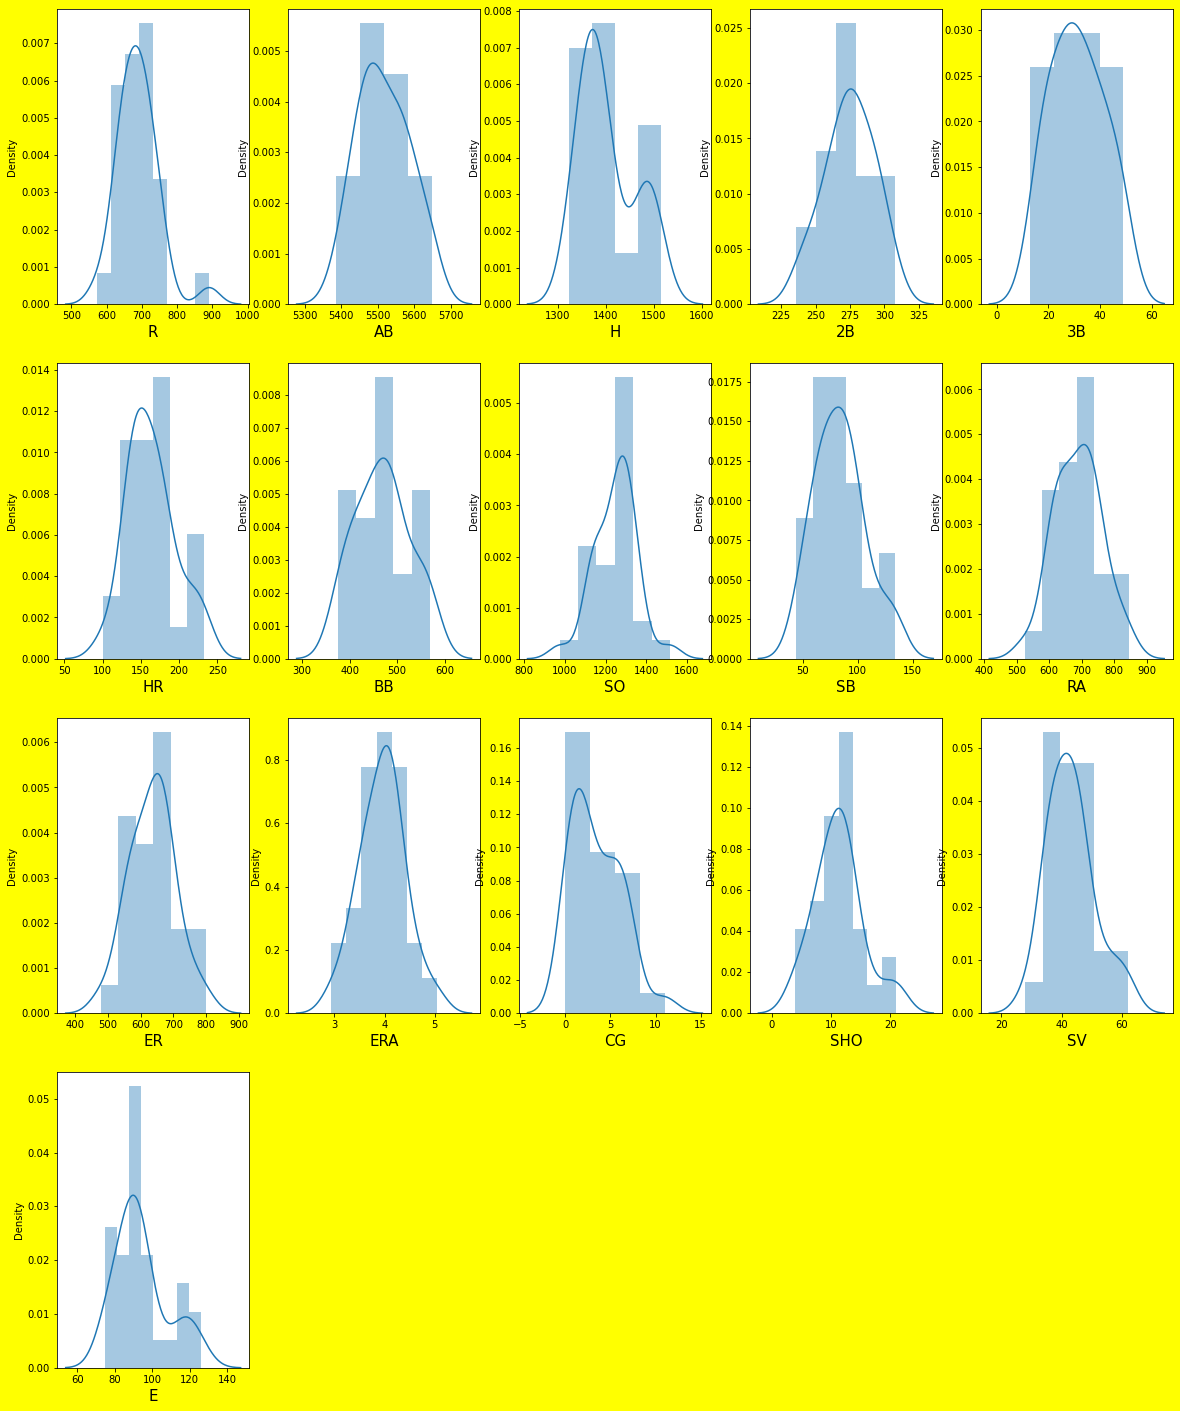

In [25]:
plt.figure(figsize =(20,25),facecolor ='yellow')
plotnum = 1

for col in x:
    if plotnum<=16:
        plt.subplot(4,5,plotnum)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize = 15)
    plotnum+=1
plt.show()

Distribution looks much more normalised now

# Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

In [26]:
df.shape

(29, 17)

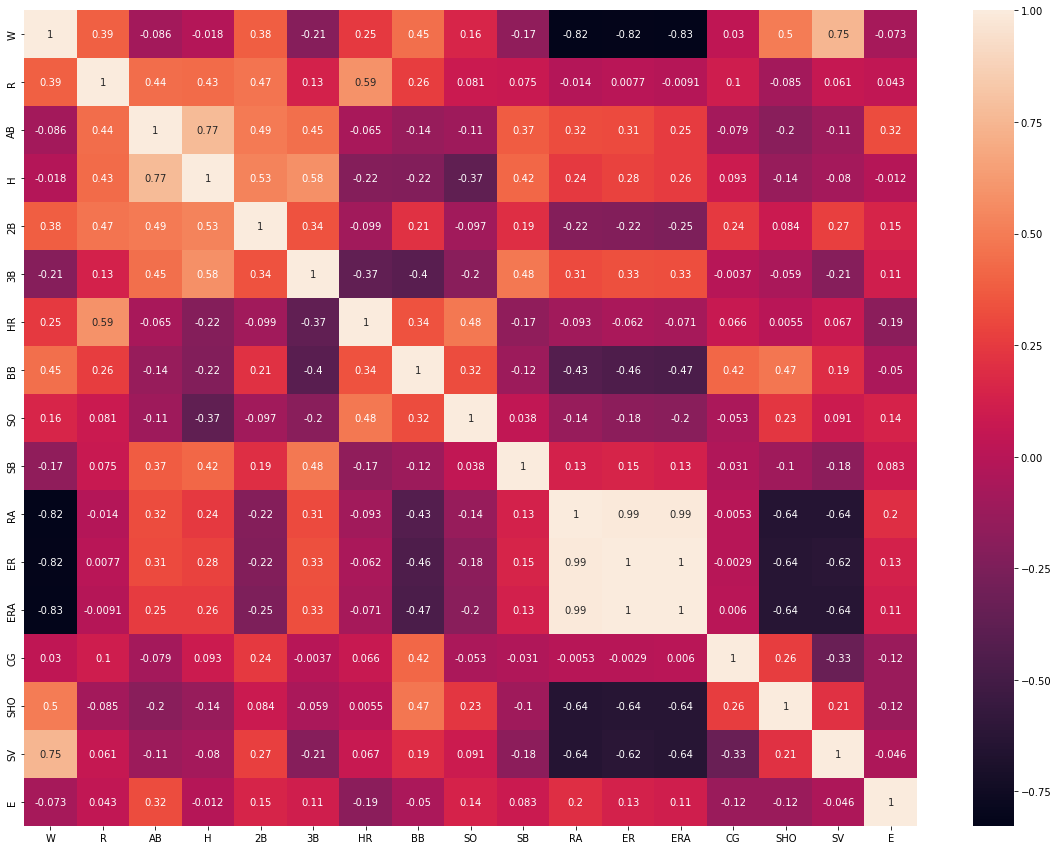

In [27]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

SV , HR , R are highly corelated with Wins(W) 

# Scatter plot

Text(0.5, 1.0, 'W vs E')

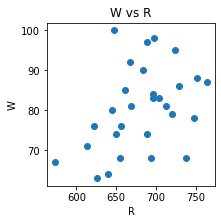

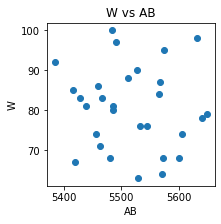

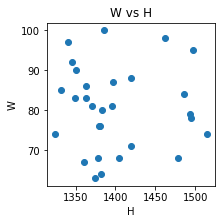

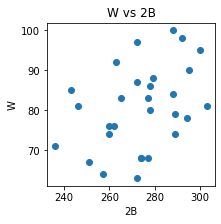

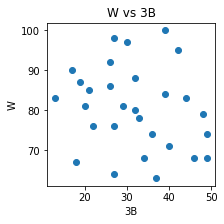

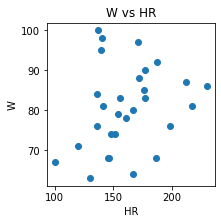

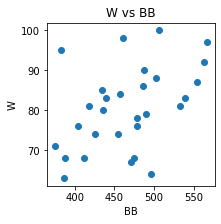

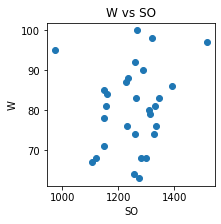

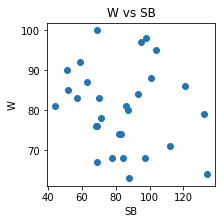

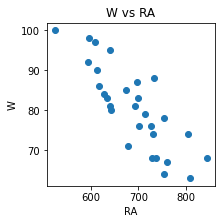

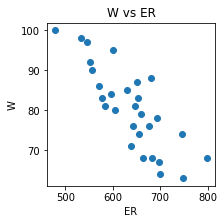

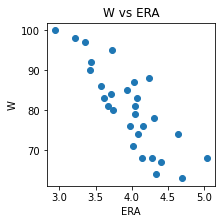

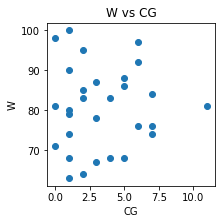

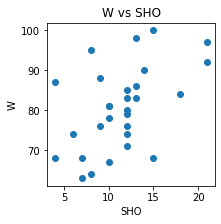

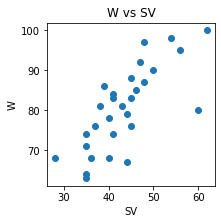

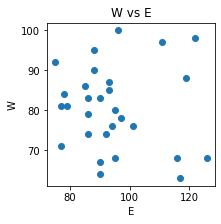

In [28]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["R"], df["W"])
plt.xlabel("R")
plt.ylabel("W")
plt.title("W vs R")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["AB"], df["W"])
plt.xlabel("AB")
plt.ylabel("W")
plt.title("W vs AB")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["H"], df["W"])
plt.xlabel("H")
plt.ylabel("W")
plt.title("W vs H")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["2B"], df["W"])
plt.xlabel("2B")
plt.ylabel("W")
plt.title("W vs 2B")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["3B"], df["W"])
plt.xlabel("3B")
plt.ylabel("W")
plt.title("W vs 3B")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["HR"], df["W"])
plt.xlabel("HR")
plt.ylabel("W")
plt.title("W vs HR")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["BB"], df["W"])
plt.xlabel("BB")
plt.ylabel("W")
plt.title("W vs BB")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["SO"], df["W"])
plt.xlabel("SO")
plt.ylabel("W")
plt.title("W vs SO")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["SB"], df["W"])
plt.xlabel("SB")
plt.ylabel("W")
plt.title("W vs SB")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["RA"], df["W"])
plt.xlabel("RA")
plt.ylabel("W")
plt.title("W vs RA")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["ER"], df["W"])
plt.xlabel("ER")
plt.ylabel("W")
plt.title("W vs ER")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["ERA"], df["W"])
plt.xlabel("ERA")
plt.ylabel("W")
plt.title("W vs ERA")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["CG"], df["W"])
plt.xlabel("CG")
plt.ylabel("W")
plt.title("W vs CG")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["SHO"], df["W"])
plt.xlabel("SHO")
plt.ylabel("W")
plt.title("W vs SHO")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["SV"], df["W"])
plt.xlabel("SV")
plt.ylabel("W")
plt.title("W vs SV")

f, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df["E"], df["W"])
plt.xlabel("E")
plt.ylabel("W")
plt.title("W vs E")

# Line plot

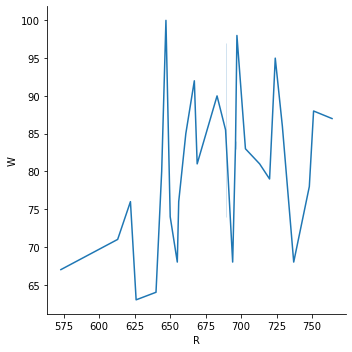

In [29]:
sns.relplot(x="R", y="W", kind="line", data=df)

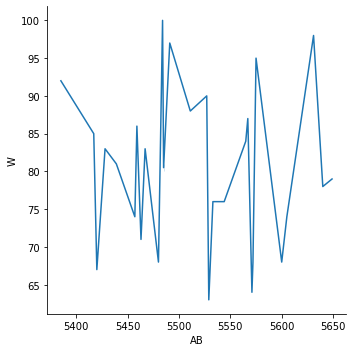

In [30]:
sns.relplot(x="AB", y="W", kind="line", data=df)

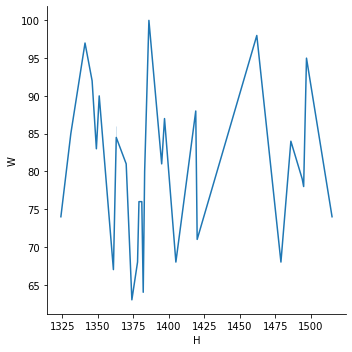

In [31]:
sns.relplot(x="H", y="W", kind="line", data=df)

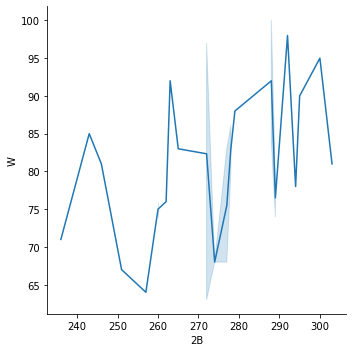

In [32]:
sns.relplot(x="2B", y="W", kind="line", data=df)

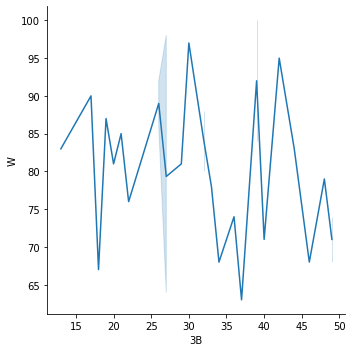

In [33]:
sns.relplot(x="3B", y="W", kind="line", data=df)

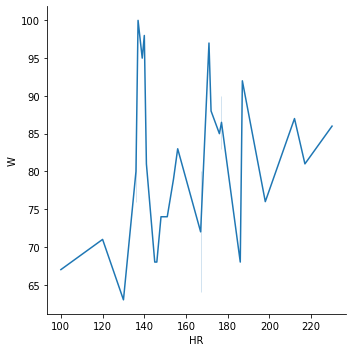

In [34]:
sns.relplot(x="HR", y="W", kind="line", data=df)

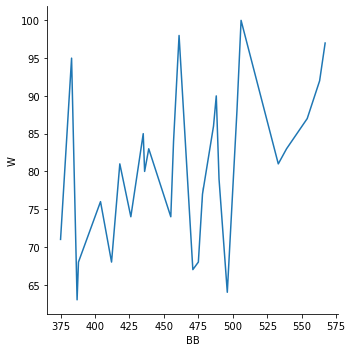

In [35]:
sns.relplot(x="BB", y="W", kind="line", data=df)

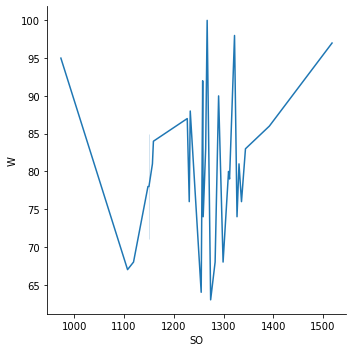

In [36]:
sns.relplot(x="SO", y="W", kind="line", data=df)

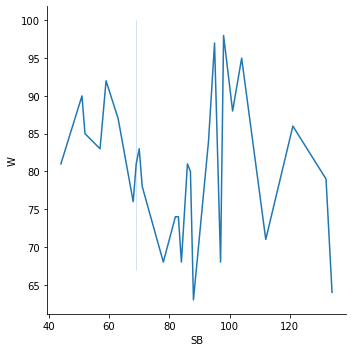

In [37]:
sns.relplot(x="SB", y="W", kind="line", data=df)

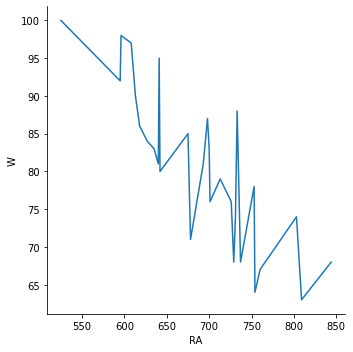

In [38]:
sns.relplot(x="RA", y="W", kind="line", data=df)

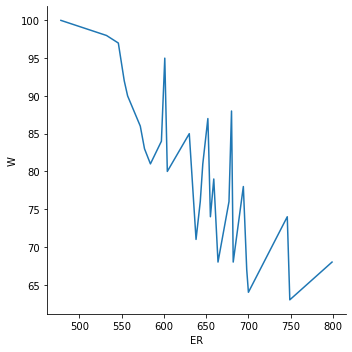

In [39]:
sns.relplot(x="ER", y="W", kind="line", data=df)

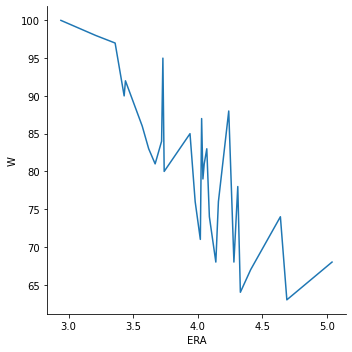

In [40]:
sns.relplot(x="ERA", y="W", kind="line", data=df)

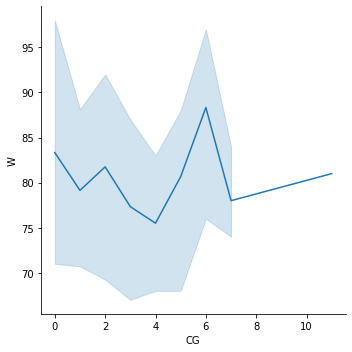

In [41]:
sns.relplot(x="CG", y="W", kind="line", data=df)

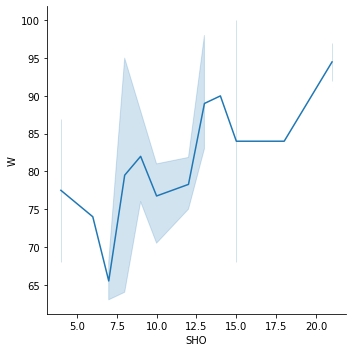

In [42]:
sns.relplot(x="SHO", y="W", kind="line", data=df)

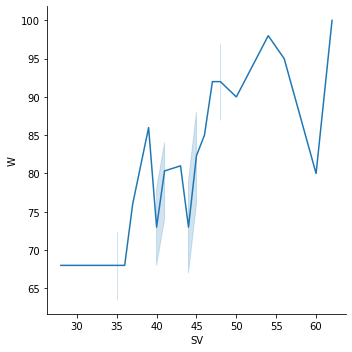

In [43]:
sns.relplot(x="SV", y="W", kind="line", data=df)

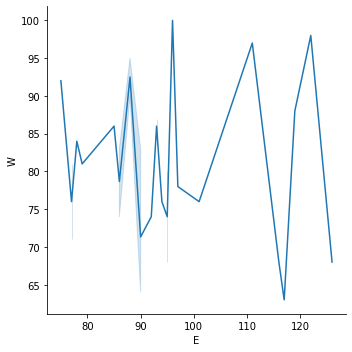

In [44]:
sns.relplot(x="E", y="W", kind="line", data=df)

all are showes that label are correlated with SV,HR,R Features..

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [45]:
X = w.drop('W', axis=1)
Y = w['W']

# Feature Scaling

In [46]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [47]:
Y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

Even though all our feature columns were of float data type I was unhappy with the decimal place differences and was worried that it might make my model biased. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

# Creating the training and testing data sets

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Regression and Evaluation Metrics

In [49]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [50]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 6.563480464865734
R2 Score is: 43.74849730662793
Cross Validation Score: 4.0755406674557415
R2 Score - Cross Validation Score is 39.67295663917219


In [51]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 8.601714202459737
R2 Score is: 3.386959015280655
Cross Validation Score: -13.900288244702036
R2 Score - Cross Validation Score is 17.287247259982692


In [52]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 12.864680330268607
R2 Score is: -116.10446137105548
Cross Validation Score: -81.208749514949
R2 Score - Cross Validation Score is -34.89571185610647


In [53]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 7.421673439596544
R2 Score is: 28.076731259178068
Cross Validation Score: -30.67139955397079
R2 Score - Cross Validation Score is 58.74813081314886


In [54]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 6.458981398770828
R2 Score is: 45.525431064634304
Cross Validation Score: -39.21965549922174
R2 Score - Cross Validation Score is 84.74508656385603


In [55]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 5.902500896087098
R2 Score is: 54.5077038150481
Cross Validation Score: -61.249035174732356
R2 Score - Cross Validation Score is 115.75673898978046


In [56]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 6.979453703441856
R2 Score is: 36.39246050251806
Cross Validation Score: -62.065869859103984
R2 Score - Cross Validation Score is 98.45833036162205


In [57]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 5.818852263691411
R2 Score is: 55.78797606093582
Cross Validation Score: -27.635282867574627
R2 Score - Cross Validation Score is 83.42325892851045


In [67]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}
xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3)
xg_grid.fit(X_train, Y_train)
print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: 0.7000418242002212
Best score: {'alpha': 1}
Best score: Ridge(alpha=1)
